In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
#%load_ext autotime

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/mahes/OneDrive/Desktop/horse_race/cleaned_horse.csv")

In [3]:
df_new = df.copy()

In [4]:
df

Unnamed: 0     rid          horseName  age_x       trainerName  \
0                0   10312         Waterproof    4.0   Shaun Keightley   
1                1   10312         Eva's Diva    6.0    Phil Middleton   
2                2   10312   Incredible Dream    7.0      Conrad Allen   
3                3   10312  Hats Off To Larry    6.0      Mick Channon   
4                4   10312             Taqwaa    7.0      Laura Morgan   
...            ...     ...                ...    ...               ...   
178228      178228  415090          Beefeater    8.0  Roydon Bergerson   
178229      178229  415090      Aimee's Jewel    4.0      Trudy Keegan   
178230      178230  415090      Times Ticking    5.0    Alby Macgregor   
178231      178231  415090       Shadows Cast    8.0     Mark Oulaghan   
178232      178232  415090         Awesome Al    7.0      Buddy Lammas   

              jockeyName  position  positionL       dist          TR  \
0         Brendan Powell         1   4.606437  15.083213  103.000000   
1             Mr Sam Lee         2  15.000000  15.083213   89.000000   
2           Joshua Moore         3   5.500000  20.500000   88.000000   
3         Marc Goldstein         4  10.000000  30.500000   75.000000   
4        Richie McLernon         5   5.500000  36.000000   67.000000   
...                  ...       ...        ...        ...         ...   
178228     Hazel Schofer         7   4.606437   5.500000   48.558126   
178229     Lisa Allpress         8   0.500000   6.000000   48.558126   
178230  Jonathan Riddell         9   4.606437   6.000000   48.558126   
178231  Johnathan Parkes        10   1.000000   7.000000   48.558126   
178232       Ryan Bishop        11   2.750000   9.750000   48.558126   

        runners_x  weight  res_win  res_place     course  countryCode  \
0               9      66      1.0        1.0    Dundalk          0.0   
1               9      65      0.0        1.0  Stratford          0.0   
2               9      72      0.0        1.0    Dundalk          0.0   
3               9      72      0.0        0.0    Dundalk          0.0   
4               9      72      0.0        0.0    Dundalk          0.0   
...           ...     ...      ...        ...        ...          ...   
178228         11      58      0.0        0.0    Dundalk          0.0   
178229         11      57      0.0        0.0    Dundalk          0.0   
178230         11      58      0.0        0.0    Dundalk          0.0   
178231         11      58      0.0        0.0    Dundalk          0.0   
178232         11      57      0.0        0.0    Dundalk          0.0   

                       marketTime                                title  \
0       2020-09-19 14:30:00+01:00                      Betway Handicap   
1       2020-10-17 14:18:00+01:00  Even Keel Foundation Selling Hurdle   
2       2020-09-19 14:30:00+01:00                      Betway Handicap   
3       2020-09-19 14:30:00+01:00                      Betway Handicap   
4       2020-09-19 14:30:00+01:00                      Betway Handicap   
...                           ...                                  ...   
178228  2020-09-19 14:30:00+01:00                      Betway Handicap   
178229  2020-09-19 14:30:00+01:00                      Betway Handicap   
178230  2020-09-19 14:30:00+01:00                      Betway Handicap   
178231  2020-09-19 14:30:00+01:00                      Betway Handicap   
178232  2020-09-19 14:30:00+01:00                      Betway Handicap   

         rclass        TRc  
0       Class 5  72.097191  
1       Class 5  66.000000  
2       Class 5  72.097191  
3       Class 5  72.097191  
4       Class 5  72.097191  
...         ...        ...  
178228  Class 5  72.097191  
178229  Class 5  72.097191  
178230  Class 5  72.097191  
178231  Class 5  72.097191  
178232  Class 5  72.097191  

[178233 rows x 20 columns]

In [44]:
df.dtypes

Unnamed: 0                   int64
rid                          int64
horseName                   object
age_x                      float64
trainerName                 object
jockeyName                  object
position                     int64
positionL                  float64
dist                       float64
TR                         float64
runners_x                    int64
weight                       int64
res_win                    float64
res_place                  float64
course                      object
countryCode                float64
marketTime     datetime64[ns, UTC]
title                       object
rclass                      object
TRc                        float64
year                         int64
month                        int64
quarter                      int64
dtype: object

In [26]:
df['marketTime'].astype('object')

0         2020-09-19 14:30:00+01:00
1         2020-10-17 14:18:00+01:00
2         2020-09-19 14:30:00+01:00
3         2020-09-19 14:30:00+01:00
4         2020-09-19 14:30:00+01:00
                    ...            
178228    2020-09-19 14:30:00+01:00
178229    2020-09-19 14:30:00+01:00
178230    2020-09-19 14:30:00+01:00
178231    2020-09-19 14:30:00+01:00
178232    2020-09-19 14:30:00+01:00
Name: marketTime, Length: 178233, dtype: object

In [ ]:
def to_datetime(s):    
    # getting the date, time and moment (AM or PM)
    date, time, moment = s.split(' ')
    
    # getting month, day and year from the date
    month, day, year = date.split('-')
    
    # getting the hour and minute from time
    hour, minute, _ = time.split(':')
    
    # casting to int
    year = int(year)
    month = int(month)
    day = int(day)
    
    hour = int(hour)
    minute = int(minute)
    
    # we round to the next hour if minute > 30
    if minute > 30:
        hour += 1
    
    if hour >= 12:
        hour -= 12
    
    # we create hour between 0 and 24 
    if moment == 'PM':
        hour += 12
    
    return datetime.datetime(year, month, day, hour)

In [29]:
def compute_time_features(df):
    df['marketTime'] = pd.to_datetime(df['marketTime'], utc=True)
    df['year'] = df['marketTime'].dt.year
    df['month'] = df['marketTime'].dt.month
    df['quarter'] = (df['month'] + 2)//3
    
    return df

In [30]:
compute_time_features(df)

Unnamed: 0     rid          horseName  age_x       trainerName  \
0                0   10312         Waterproof    4.0   Shaun Keightley   
1                1   10312         Eva's Diva    6.0    Phil Middleton   
2                2   10312   Incredible Dream    7.0      Conrad Allen   
3                3   10312  Hats Off To Larry    6.0      Mick Channon   
4                4   10312             Taqwaa    7.0      Laura Morgan   
...            ...     ...                ...    ...               ...   
178228      178228  415090          Beefeater    8.0  Roydon Bergerson   
178229      178229  415090      Aimee's Jewel    4.0      Trudy Keegan   
178230      178230  415090      Times Ticking    5.0    Alby Macgregor   
178231      178231  415090       Shadows Cast    8.0     Mark Oulaghan   
178232      178232  415090         Awesome Al    7.0      Buddy Lammas   

              jockeyName  position  positionL       dist          TR  ...  \
0         Brendan Powell         1   4.606437  15.083213  103.000000  ...   
1             Mr Sam Lee         2  15.000000  15.083213   89.000000  ...   
2           Joshua Moore         3   5.500000  20.500000   88.000000  ...   
3         Marc Goldstein         4  10.000000  30.500000   75.000000  ...   
4        Richie McLernon         5   5.500000  36.000000   67.000000  ...   
...                  ...       ...        ...        ...         ...  ...   
178228     Hazel Schofer         7   4.606437   5.500000   48.558126  ...   
178229     Lisa Allpress         8   0.500000   6.000000   48.558126  ...   
178230  Jonathan Riddell         9   4.606437   6.000000   48.558126  ...   
178231  Johnathan Parkes        10   1.000000   7.000000   48.558126  ...   
178232       Ryan Bishop        11   2.750000   9.750000   48.558126  ...   

        res_place     course  countryCode                marketTime  \
0             1.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
1             1.0  Stratford          0.0 2020-10-17 13:18:00+00:00   
2             1.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
3             0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
4             0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
...           ...        ...          ...                       ...   
178228        0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178229        0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178230        0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178231        0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178232        0.0    Dundalk          0.0 2020-09-19 13:30:00+00:00   

                                      title   rclass        TRc  year month  \
0                           Betway Handicap  Class 5  72.097191  2020     9   
1       Even Keel Foundation Selling Hurdle  Class 5  66.000000  2020    10   
2                           Betway Handicap  Class 5  72.097191  2020     9   
3                           Betway Handicap  Class 5  72.097191  2020     9   
4                           Betway Handicap  Class 5  72.097191  2020     9   
...                                     ...      ...        ...   ...   ...   
178228                      Betway Handicap  Class 5  72.097191  2020     9   
178229                      Betway Handicap  Class 5  72.097191  2020     9   
178230                      Betway Handicap  Class 5  72.097191  2020     9   
178231                      Betway Handicap  Class 5  72.097191  2020     9   
178232                      Betway Handicap  Class 5  72.097191  2020     9   

        quarter  
0             3  
1             4  
2             3  
3             3  
4             3  
...         ...  
178228        3  
178229        3  
178230        3  
178231        3  
178232        3  

[178233 rows x 23 columns]

In [31]:
df.columns

Index(['Unnamed: 0', 'rid', 'horseName', 'age_x', 'trainerName', 'jockeyName',
       'position', 'positionL', 'dist', 'TR', 'runners_x', 'weight', 'res_win',
       'res_place', 'course', 'countryCode', 'marketTime', 'title', 'rclass',
       'TRc', 'year', 'month', 'quarter'],
      dtype='object')

In [32]:
# Remove column name 'A'
df.drop(['Unnamed: 0'], axis=1)

rid          horseName  age_x       trainerName        jockeyName  \
0        10312         Waterproof    4.0   Shaun Keightley    Brendan Powell   
1        10312         Eva's Diva    6.0    Phil Middleton        Mr Sam Lee   
2        10312   Incredible Dream    7.0      Conrad Allen      Joshua Moore   
3        10312  Hats Off To Larry    6.0      Mick Channon    Marc Goldstein   
4        10312             Taqwaa    7.0      Laura Morgan   Richie McLernon   
...        ...                ...    ...               ...               ...   
178228  415090          Beefeater    8.0  Roydon Bergerson     Hazel Schofer   
178229  415090      Aimee's Jewel    4.0      Trudy Keegan     Lisa Allpress   
178230  415090      Times Ticking    5.0    Alby Macgregor  Jonathan Riddell   
178231  415090       Shadows Cast    8.0     Mark Oulaghan  Johnathan Parkes   
178232  415090         Awesome Al    7.0      Buddy Lammas       Ryan Bishop   

        position  positionL       dist          TR  runners_x  ...  res_place  \
0              1   4.606437  15.083213  103.000000          9  ...        1.0   
1              2  15.000000  15.083213   89.000000          9  ...        1.0   
2              3   5.500000  20.500000   88.000000          9  ...        1.0   
3              4  10.000000  30.500000   75.000000          9  ...        0.0   
4              5   5.500000  36.000000   67.000000          9  ...        0.0   
...          ...        ...        ...         ...        ...  ...        ...   
178228         7   4.606437   5.500000   48.558126         11  ...        0.0   
178229         8   0.500000   6.000000   48.558126         11  ...        0.0   
178230         9   4.606437   6.000000   48.558126         11  ...        0.0   
178231        10   1.000000   7.000000   48.558126         11  ...        0.0   
178232        11   2.750000   9.750000   48.558126         11  ...        0.0   

           course  countryCode                marketTime  \
0         Dundalk          0.0 2020-09-19 13:30:00+00:00   
1       Stratford          0.0 2020-10-17 13:18:00+00:00   
2         Dundalk          0.0 2020-09-19 13:30:00+00:00   
3         Dundalk          0.0 2020-09-19 13:30:00+00:00   
4         Dundalk          0.0 2020-09-19 13:30:00+00:00   
...           ...          ...                       ...   
178228    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178229    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178230    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178231    Dundalk          0.0 2020-09-19 13:30:00+00:00   
178232    Dundalk          0.0 2020-09-19 13:30:00+00:00   

                                      title   rclass        TRc  year  month  \
0                           Betway Handicap  Class 5  72.097191  2020      9   
1       Even Keel Foundation Selling Hurdle  Class 5  66.000000  2020     10   
2                           Betway Handicap  Class 5  72.097191  2020      9   
3                           Betway Handicap  Class 5  72.097191  2020      9   
4                           Betway Handicap  Class 5  72.097191  2020      9   
...                                     ...      ...        ...   ...    ...   
178228                      Betway Handicap  Class 5  72.097191  2020      9   
178229                      Betway Handicap  Class 5  72.097191  2020      9   
178230                      Betway Handicap  Class 5  72.097191  2020      9   
178231                      Betway Handicap  Class 5  72.097191  2020      9   
178232                      Betway Handicap  Class 5  72.097191  2020      9   

        quarter  
0             3  
1             4  
2             3  
3             3  
4             3  
...         ...  
178228        3  
178229        3  
178230        3  
178231        3  
178232        3  

[178233 rows x 22 columns]

In [33]:
df.isnull().sum()

Unnamed: 0     0
rid            0
horseName      0
age_x          0
trainerName    0
jockeyName     0
position       0
positionL      0
dist           0
TR             0
runners_x      0
weight         0
res_win        0
res_place      0
course         0
countryCode    0
marketTime     0
title          0
rclass         0
TRc            0
year           0
month          0
quarter        0
dtype: int64

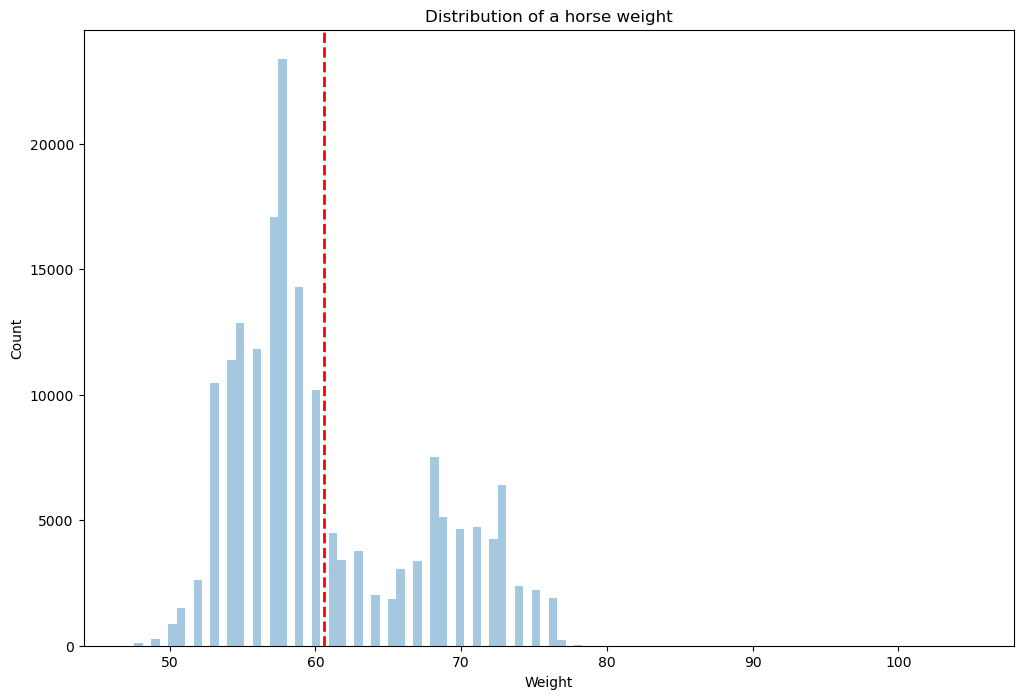

In [34]:
# Draw the mean of a horse weight on same plot
plt.figure(figsize=(12, 8))
sns.distplot(df['weight'], bins=100, kde=False)
plt.title("Distribution of a horse weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.axvline(df['weight'].mean(), color='r', linestyle='dashed', linewidth=2)

plt.show()

In [35]:
# Find the number of horses each race
numHorsePerRace = df.groupby('rid')['horseName'].count().value_counts()

Text(0.5, 1.0, 'Distribution of Number of Horses per Race')

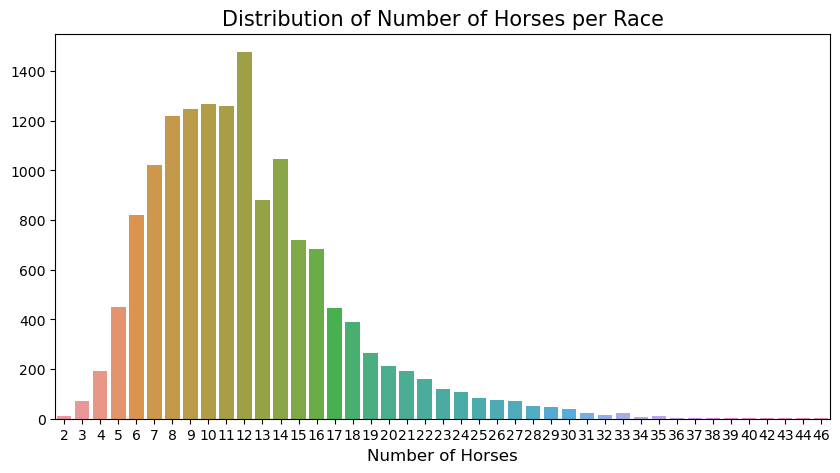

In [36]:
# Plot the distribution of the number of horses
plt.figure(figsize=(10, 5))
sns.barplot(x=numHorsePerRace.index, y=numHorsePerRace.values)
plt.xlabel('Number of Horses', fontsize=12)
plt.ylabel

# Set title
plt.title('Distribution of Number of Horses per Race', fontsize=15)

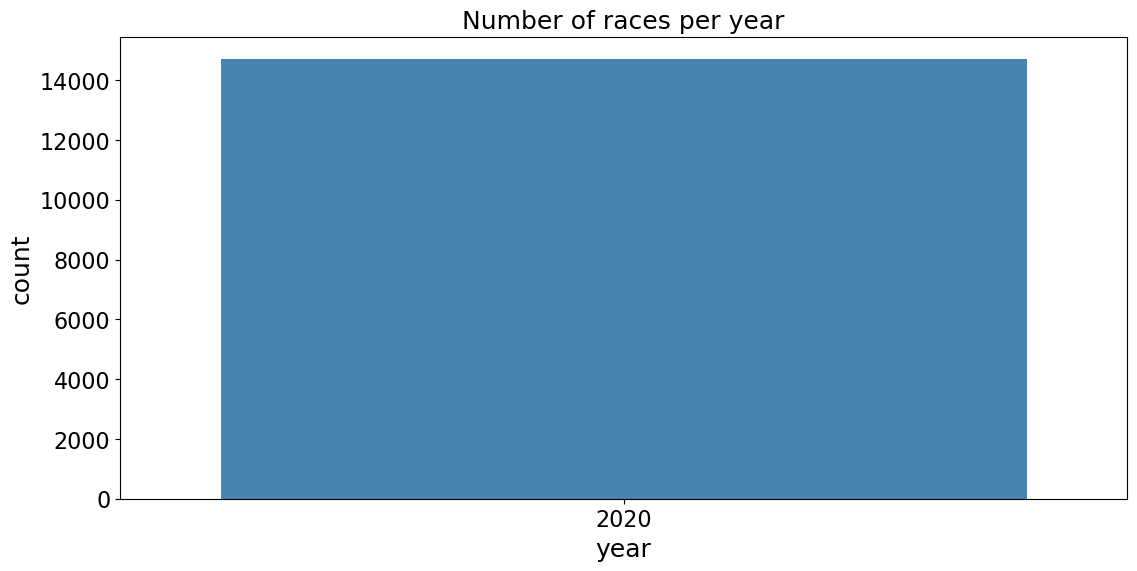

In [38]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.countplot(x = df.drop_duplicates(subset=['rid', 'year'], keep='first')['year'], palette='Blues_d')
   
plt.title('Number of races in 2020 year', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.savefig('year_distribution.png')
plt.show()

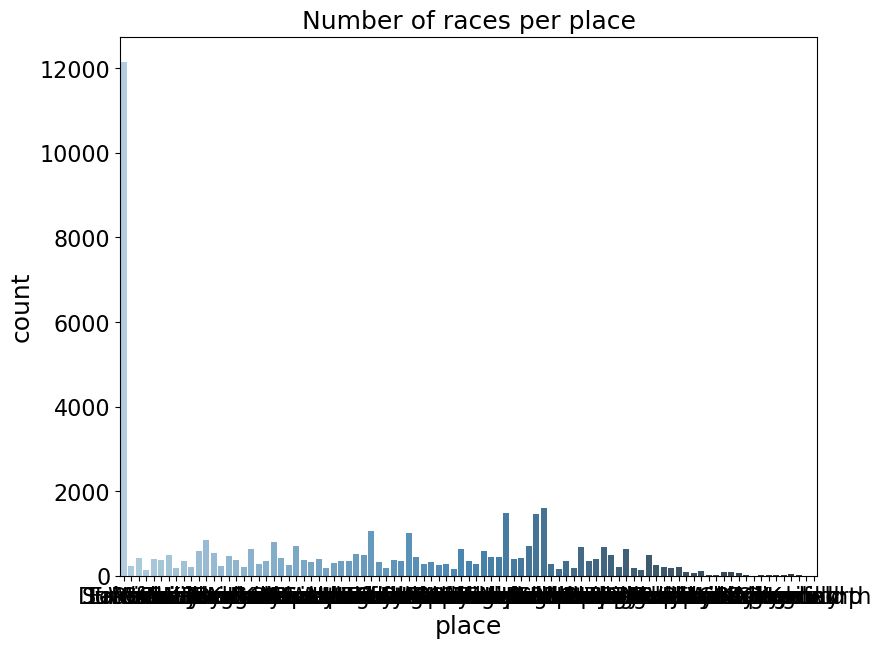

In [40]:
fig, ax = plt.subplots(figsize = (9, 7))
sns.countplot(x = df.drop_duplicates(subset=['rid', 'course'], keep='first')['course'], palette='Blues_d')
   
plt.title('Number of races per place', fontsize=18)
plt.xlabel('place', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.savefig('hippo_distribution.png')
plt.show()

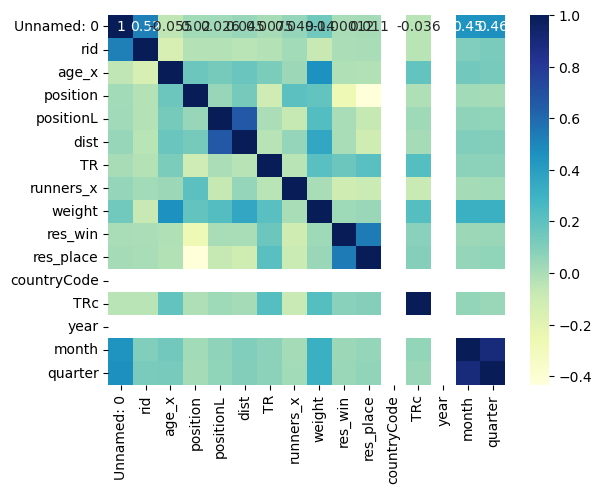

In [59]:
# plotting correlation heatmap 
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

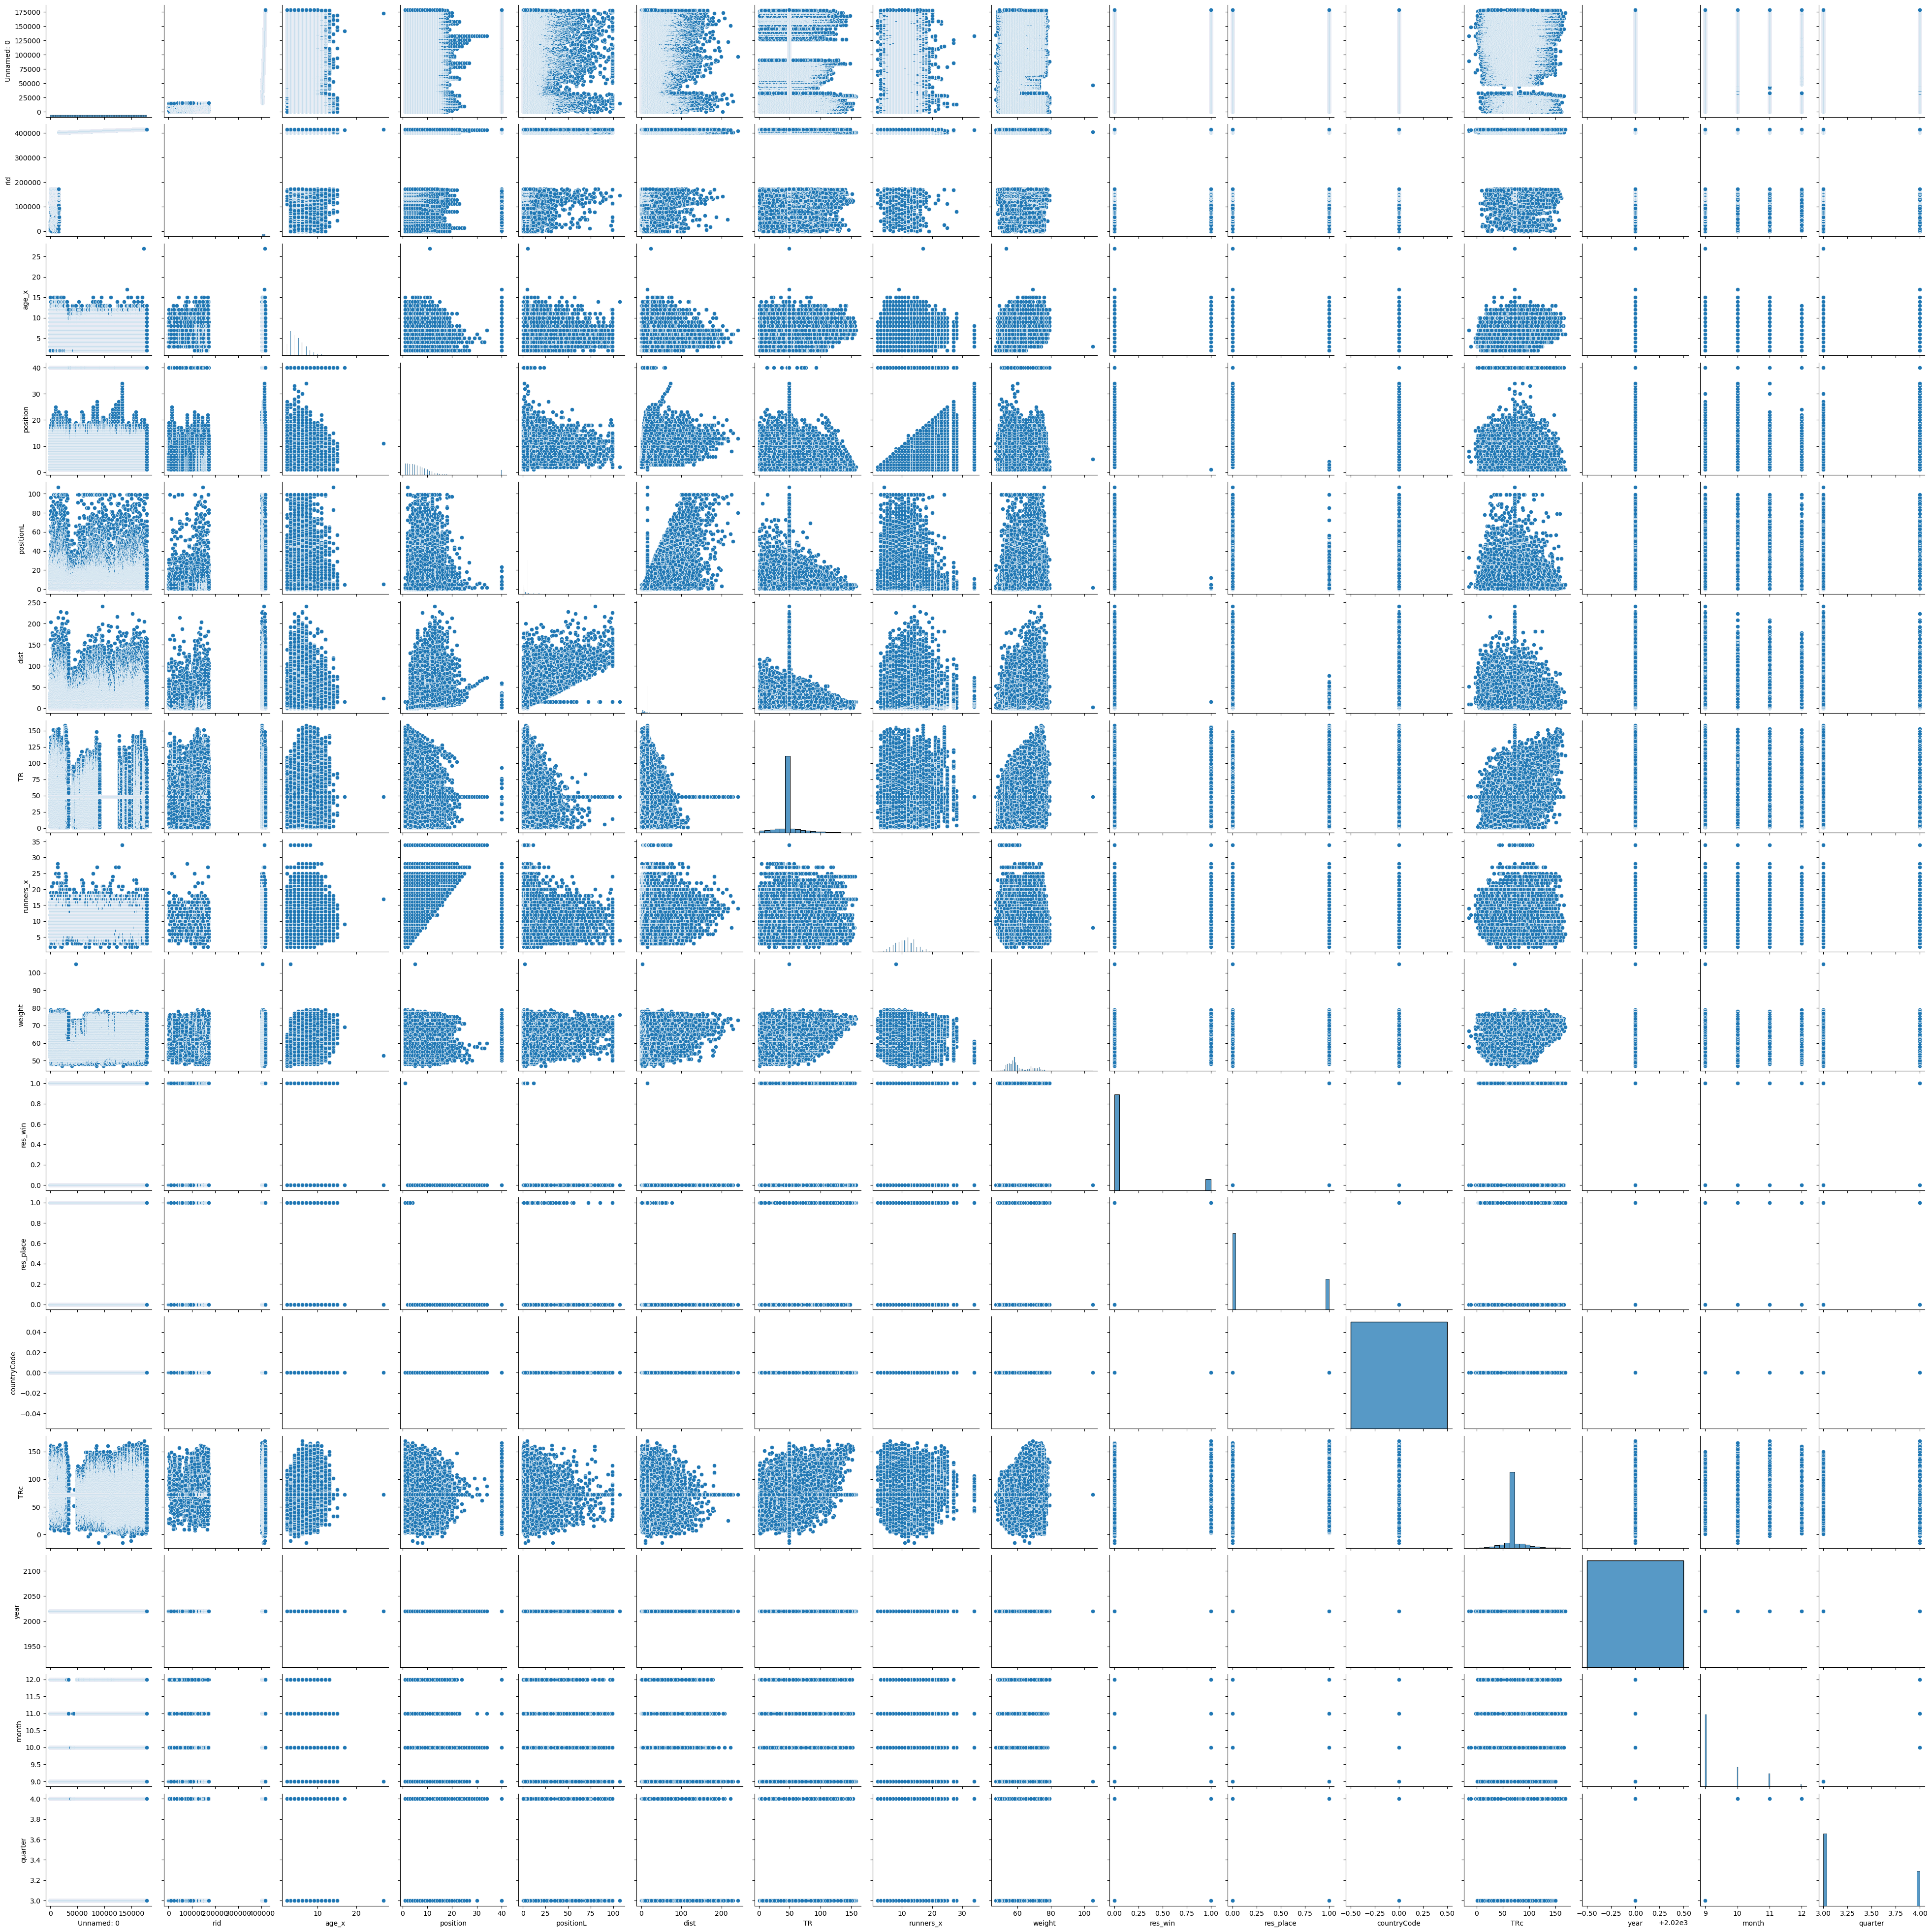

In [63]:
sns.pairplot(df)